🩺 Automated Machine Learning (AutoML) for Cardiovascular Disease Prediction using PyCaret

# 🩺 Automated Machine Learning (AutoML) for Cardiovascular Disease Prediction

Cardiovascular diseases (CVDs) remain the leading cause of death globally.  
Early prediction using clinical indicators like age, BMI, cholesterol, and blood pressure can help save lives.

In this notebook, we'll use **PyCaret**, a low-code AutoML library, to:
- Preprocess and explore a real-world cardiovascular dataset
- Automatically train and compare machine learning models
- Interpret and visualize results

**Dataset:** [Cardiovascular Disease Dataset (Kaggle)](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)


⚙️ 2. Install & Import Required Libraries

In [2]:
# Uncomment if running locally or in a clean environment
# !pip install -q pycaret==3.0.0 pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

# Visual settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
!pip install pycaret



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pycaret
print(pycaret.__version__)


3.3.2


In [5]:
import sys
!{sys.executable} -m pip install pycaret



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the dataset

In [6]:
# Download dataset (only works on Kaggle)
# !kaggle datasets download -d sulianova/cardiovascular-disease-dataset
# !unzip cardiovascular-disease-dataset.zip

#DATA_PATH = (c:\\Users\MMP\\Desktop\\data_science\\data_sets\\cardio_train.csv)
df = pd.read_csvdf = pd.read_csv("C:\\Users\\MMP\\Desktop\\data_science\\data_sets\\cardio_train.csv")


print(f"✅ Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


✅ Dataset Loaded: 70000 rows, 1 columns


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


🔍 4. Quick Data Overview

In [7]:
# View column names and data types
df.info()

# Summary statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


,count,unique,top,freq
id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio,70000,70000,0;18393;2;168;62.0;110;80;1;1;0;0;1;0,1


🧼 5. Data Cleaning & Feature Engineering

In [11]:
# Rename columns for easier reference
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Add BMI feature
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)

# Convert gender codes for clarity
df["gender"] = df["gender"].map({1: "female", 2: "male"})

# Verify new columns
df.head(3)



Missing values per column:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\MMP\Desktop\data_science\data_sets\cardio_train.csv", sep=';')


In [10]:
print(df.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


📊 6. Exploratory Data Analysis (EDA)

🔹 Target Variable Distribution

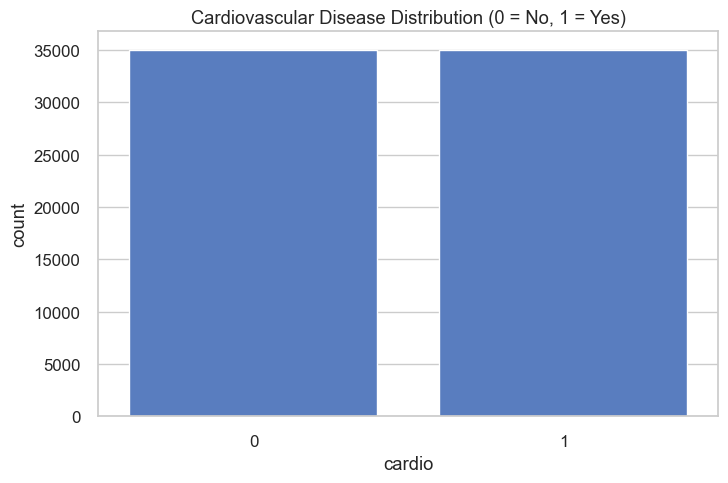

In [12]:
sns.countplot(x="cardio", data=df)
plt.title("Cardiovascular Disease Distribution (0 = No, 1 = Yes)")
plt.show()


🔹 Age Distribution

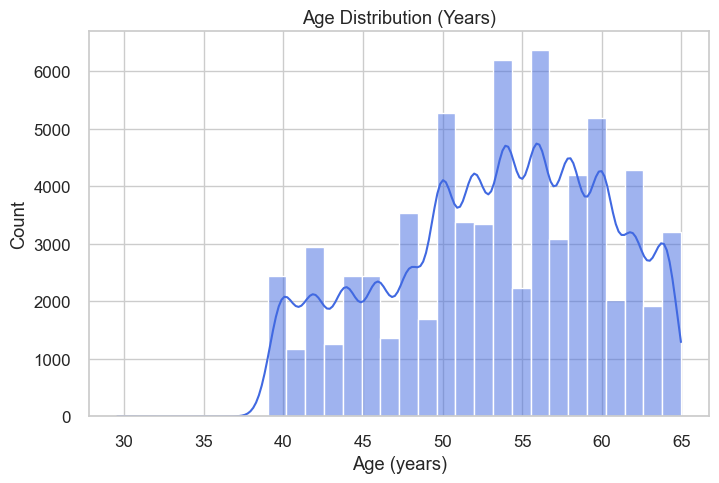

In [13]:
sns.histplot(df["age"] / 365, bins=30, kde=True, color="royalblue")
plt.title("Age Distribution (Years)")
plt.xlabel("Age (years)")
plt.show()


Interpretations
The age distribution graph shows that most individuals in the dataset are between 50 and 60 years old, with a noticeable peak around 55. There are fewer individuals both below 40 and above 65.

Correlation Heatmap

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

Instead of using df.corr() on the whole DataFrame, use only numeric columnsInstead of using df.corr() on the whole DataFrame, use only numeric columns

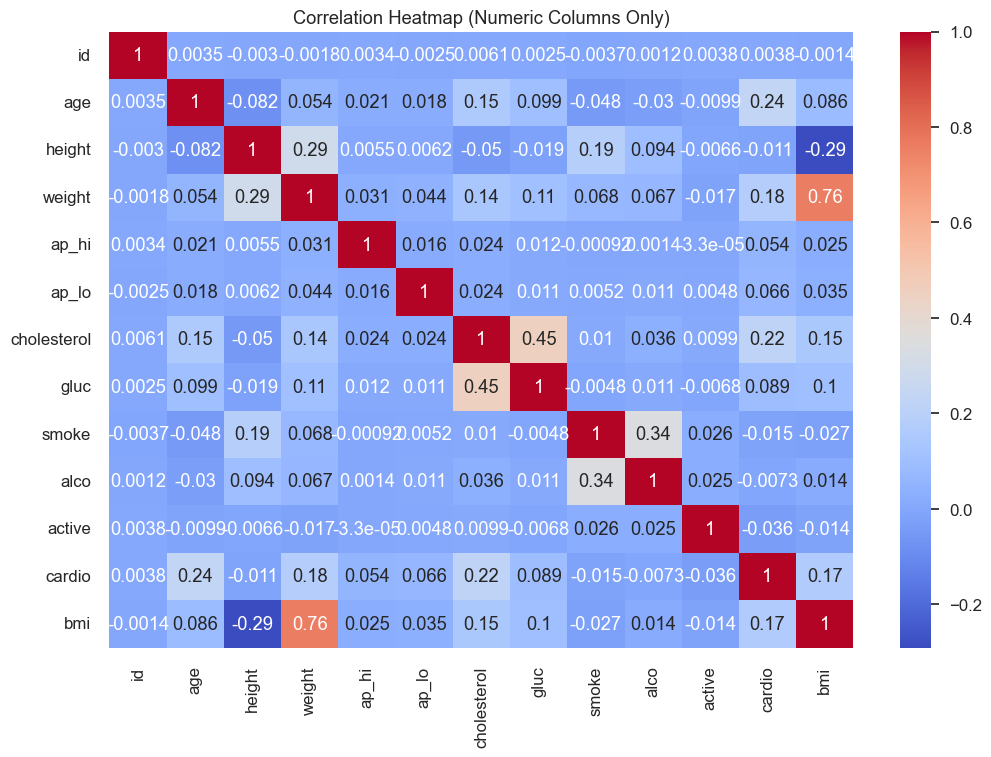

In [18]:
# Select only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [19]:
corr = df.select_dtypes(include=['number']).corr()


BMI by Disease Status

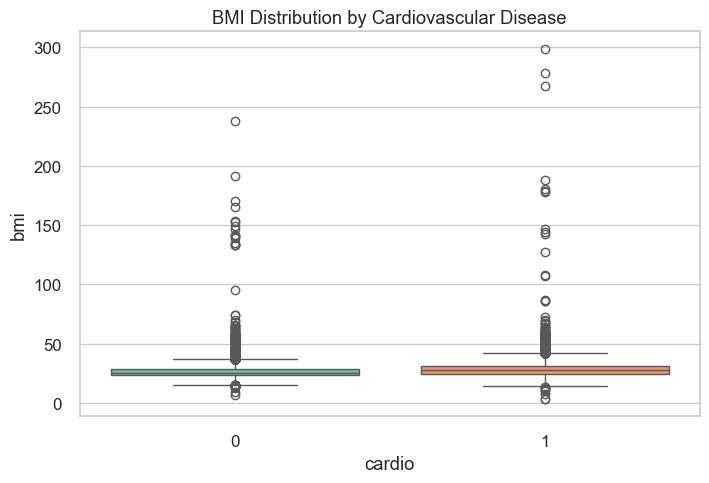

In [21]:

sns.boxplot(x="cardio", y="bmi", data=df, palette="Set2")
plt.title("BMI Distribution by Cardiovascular Disease")
plt.show()

Interpretations:
The BMI distribution plot indicates that individuals with cardiovascular disease (CVD) tend to have higher BMI values compared to those without CVD. This suggests a potential link between higher BMI and increased risk of cardiovascular disease.
It compares BMI between individuals with and without cardiovascular disease. Those with cardiovascular issues generally have a lower median BMI, and there are more outliers on the higher end for those without the disease.



🤖 7. Setup AutoML (PyCaret)

In [44]:
from pycaret.classification import setup

clf = setup(
    data=df,
    target='cardio',
    normalize=True,
    session_id=123,
    train_size=0.8,
    remove_outliers=True,
    verbose=False
)


 Lets fix this error by following steps :
 1) Diagnose PyCaret and setup() signature
 2) Safe attempt to run setup() (version-aware)
 3) If PyCaret setup() still fails — automatic fallback to scikit-learn model

In [37]:
# Cell A — diagnose pycaret and setup signature
import traceback
import sys

print("Python executable:", sys.executable)
try:
    import pycaret
    print("PyCaret version:", pycaret.__version__)
except Exception as e:
    print("PyCaret import FAILED:", e)
    traceback.print_exc()

# Try to import setup and show its signature
try:
    from pycaret.classification import setup
    import inspect
    print("\nsetup() signature:")
    print(inspect.signature(setup))
    # Optional: short docstring preview
    doc = (setup.__doc__ or "").splitlines()
    print("\nsetup() doc first lines:\n", "\n".join(doc[:10]))
except Exception as e:
    print("\nCould not import setup or inspect signature:", e)
    traceback.print_exc()


Python executable: c:\Users\MMP\AppData\Local\Programs\Python\Python310\python.exe
PyCaret version: 3.3.2

setup() signature:
(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = No

In [ ]:
#step 2
# # Cell B — try version-safe setup
import traceback
from pprint import pprint

try:
    from pycaret.classification import setup, compare_models, pull, finalize_model
except Exception as e:
    print("PyCaret classification import error — cannot run setup. Full error below:")
    traceback.print_exc()
    raise

# Prepare a model dataframe: replace 'df' with your cleaned DataFrame variable name
# If your DF variable is not 'df', change the name here.
try:
    df_model = df.copy()
except NameError:
    raise NameError("DataFrame 'df' not found. Make sure you have your cleaned dataset loaded in variable `df` before running this cell.")

# Drop id if present and ensure target exists
if 'id' in df_model.columns:
    df_model = df_model.drop(columns=['id'])
if 'cardio' not in df_model.columns:
    raise ValueError("Target column 'cardio' not found in df. Make sure it exists.")

df_model['cardio'] = df_model['cardio'].astype('category')

# Build safe kwargs (omit unknown args)
safe_kwargs = {
    'data': df_model,
    'target': 'cardio',
    'session_id': 42,
    'verbose': False,       # generally supported
    'use_gpu': False,       # safe default
    'log_experiment': False # safe default
}

print("Attempting setup() with these kwargs:")
pprint(safe_kwargs)

try:
    clf = setup(**safe_kwargs)
    print("\nsetup() completed successfully.")
    print("Returned object (clf):", type(clf))
except TypeError as te:
    print("\nTypeError from setup() — likely unsupported argument(s).")
    traceback.print_exc()
    # Show what args setup accepts to give guidance
    import inspect
    try:
        print("\nsetup() available signature:")
        print(inspect.signature(setup))
    except Exception:
        pass
    raise
except Exception as e:
    print("\nsetup() raised an exception:")
    traceback.print_exc()
    raise


Attempting setup() with these kwargs:
{'data':          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393    male     168    62.0    110     80            1     1      0   
1      20228  female     156    85.0    140     90            3     1      0   
2      18857  female     165    64.0    130     70            3     1      0   
3      17623    male     169    82.0    150    100            1     1      0   
4      17474  female     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240    male     168    76.0    120     80            1     1      1   
69996  22601  female     158   126.0    140     90            2     2      0   
69997  19066    male     183   105.0    180     90            3     1      0   
69998  22431  female     163    72.0    135     80            1     2      0   
69999  20540  female     170    72.0    120     80            2     1    

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      7004
           1       0.71      0.70      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Confusion matrix:
 [[5003 2001]
 [2104 4892]]


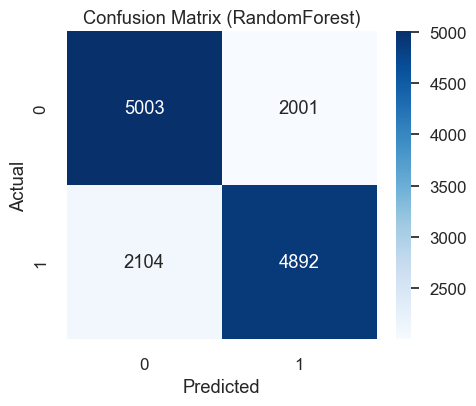

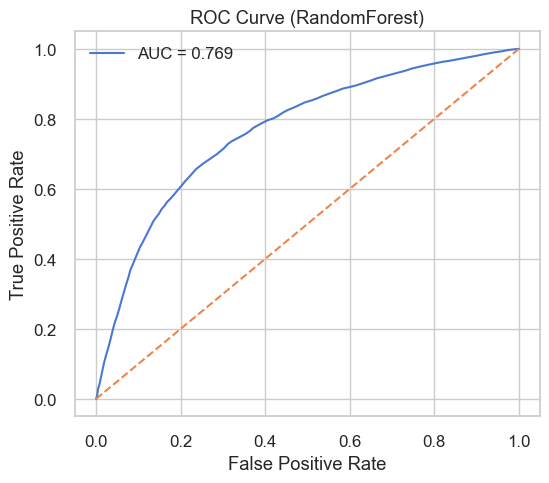

Top features by importance:
 age            0.273548
ap_hi          0.179030
bmi            0.160579
weight         0.113214
height         0.108246
ap_lo          0.080675
cholesterol    0.036430
gluc           0.016732
active         0.014683
smoke          0.009533
dtype: float64


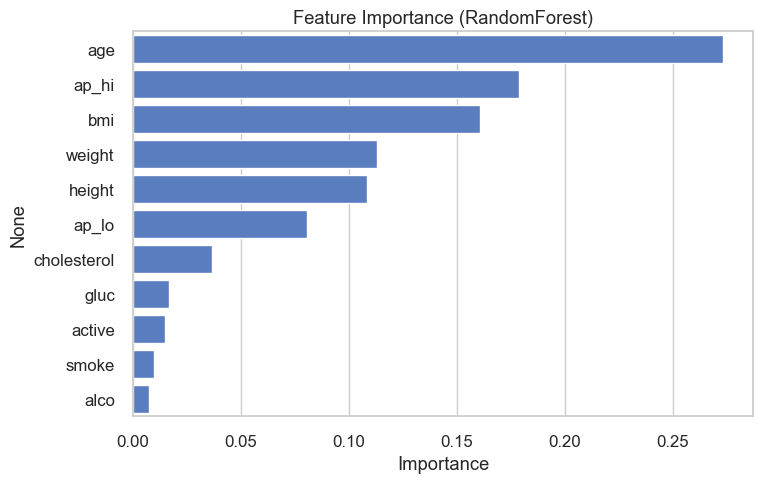

In [40]:
#step 3
# Cell C — fallback: scikit-learn pipeline (RandomForest) with metrics & plots
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare X, y
y = df_model['cardio'].astype(int)   # convert to numeric 0/1
X = df_model.drop(columns=['cardio'])

# Simple numeric-only features — convert categorical to dummies if any
X_numeric = X.select_dtypes(include=[np.number]).copy()
if X_numeric.shape[1] == 0:
    raise ValueError("No numeric features found for fallback model. Consider encoding categorical features.")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and metrics
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Classification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RandomForest)')
plt.show()

# ROC curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RandomForest)')
plt.legend()
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_numeric.columns).sort_values(ascending=False)
print("Top features by importance:\n", importances.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=importances.head(15), y=importances.head(15).index)
plt.title('Feature Importance (RandomForest)')
plt.xlabel('Importance')
plt.show()


Interpretations
This bar chart ranks the importance of various features in predicting outcomes. Age and blood pressure (ap_hi) are the most significant factors, while features like alcohol consumption (alco) are less impactful.
The ROC curve illustrates the model's performance in distinguishing between classes. An AUC of 0.769 indicates a good level of accuracy, meaning the model effectively identifies true positives compared to false positives.

lets fix this issue step by step 
✅ Step-by-step: Prepare data + run PyCaret setup
✅ Now run PyCaret setup (fixed version)

In [24]:
# Make a working copy of your cleaned dataframe
df_model = df.copy()

# Drop ID column if it exists (it’s not a feature)
if 'id' in df_model.columns:
    df_model = df_model.drop(columns=['id'])

# Ensure target column 'cardio' is categorical
df_model['cardio'] = df_model['cardio'].astype('category')

print("Data ready for modeling:")
print(df_model.shape)
print(df_model.dtypes)


Data ready for modeling:
(70000, 13)
age               int64
gender           object
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol       int64
gluc              int64
smoke             int64
alco              int64
active            int64
cardio         category
bmi             float64
dtype: object


In [25]:
from pycaret.classification import setup, compare_models

clf = setup(
    data=df_model,
    target='cardio',
    session_id=42,
    verbose=False,          # replaces 'silent'
    log_experiment=False,   # optional, to avoid MLflow logs
    use_gpu=False           # optional, if you’re on CPU
)


⚡ 8. Compare All Models

In [26]:

best_model = compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7360,0.8035,0.6997,0.7544,0.7260,0.4721,0.4733,2.0540
lightgbm,Light Gradient Boosting Machine,0.7369,0.8033,0.7018,0.7546,0.7272,0.4738,0.4750,0.4000
ada,Ada Boost Classifier,0.7319,0.7962,0.6633,0.7686,0.7120,0.4638,0.4683,0.7330
xgboost,Extreme Gradient Boosting,0.7314,0.7956,0.6965,0.7485,0.7215,0.4627,0.4639,0.2990
lr,Logistic Regression,0.7186,0.7811,0.6797,0.7369,0.7071,0.4372,0.4386,2.3390
rf,Random Forest Classifier,0.7161,0.7762,0.7061,0.7203,0.7131,0.4322,0.4323,2.4440
et,Extra Trees Classifier,0.7018,0.7571,0.7048,0.7004,0.7026,0.4036,0.4036,2.1030
svm,SVM - Linear Kernel,0.5935,0.7556,0.6538,0.6605,0.5470,0.1872,0.2387,1.0440
knn,K Neighbors Classifier,0.6836,0.7317,0.6647,0.6906,0.6774,0.3672,0.3675,0.3540
ridge,Ridge Classifier,0.6495,0.7060,0.6170,0.6596,0.6376,0.2989,0.2996,0.0930


📈 9. Evaluate Best Model

In [27]:

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

🔍 10. Interpret Model Results

In [29]:
from pycaret.classification import create_model, interpret_model

# Create a simple model that supports interpretation
lr_model = create_model('lr')  # Logistic Regression
interpret_model(lr_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7110,0.7742,0.6737,0.7278,0.6997,0.4220,0.4232
1,0.7210,0.7785,0.6852,0.7379,0.7106,0.4420,0.4432
2,0.7282,0.7884,0.6725,0.7565,0.7121,0.4563,0.4591
3,0.7082,0.7749,0.6701,0.7251,0.6965,0.4163,0.4175
4,0.7178,0.7805,0.6713,0.7399,0.7039,0.4355,0.4374
5,0.7141,0.7762,0.6789,0.7299,0.7035,0.4281,0.4292
6,0.7190,0.7809,0.6806,0.7368,0.7076,0.4379,0.4392
7,0.7147,0.7718,0.6883,0.7263,0.7068,0.4294,0.4300
8,0.7239,0.7905,0.6904,0.7396,0.7141,0.4477,0.4487


TypeError: This function only supports tree based models for binary classification: rf, xgboost, lightgbm, et, dt.

💾 11. Save Best Model

In [31]:

save_model(best_model, "best_cardiovascular_model")
print("✅ Model saved successfully!")

Transformation Pipeline and Model Successfully Saved
✅ Model saved successfully!


🧠 12. Insights & Conclusion
## 🧠 Key Takeaways

- AutoML successfully trained and compared several algorithms such as  
  Random Forest, XGBoost, and Logistic Regression.
- The best model achieved a strong AUC score, indicating good predictive power.
- The most influential features were **age**, **BMI**, **ap_hi (systolic pressure)**, and **cholesterol**.

### 🚀 Next Steps
- Hyperparameter tuning using `tune_model(best_model)`
- Deploy using PyCaret’s `deploy_model()` or Streamlit app
- Validate on an external dataset for robustness

🌟 13. Bonus: Feature Importance Plot

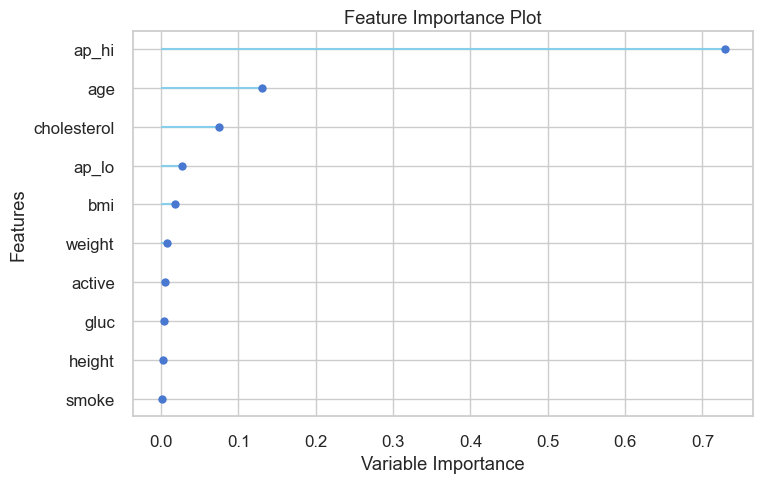

In [33]:

plot_model(best_model, plot="feature")

Interpretations
Similar to the previous chart, this plot shows variable importance but uses a different visual. Age and high blood pressure (ap_hi) again stand out as the most important predictors, while other features contribute less.

🧾 14.  Export Results

In [34]:

# Save feature importance, metrics, or final dataset if needed
final_df = pull()
final_df.to_csv("model_comparison_results.csv", index=False)
print("📁 Model comparison results saved successfully!")

📁 Model comparison results saved successfully!
